In [1]:
print("Hello World")

Hello World


In [2]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
# Importing data

data = pd.read_csv("120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
regions = pd.read_csv("120-years-of-olympic-history-athletes-and-results/noc_regions.csv")

print(data.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

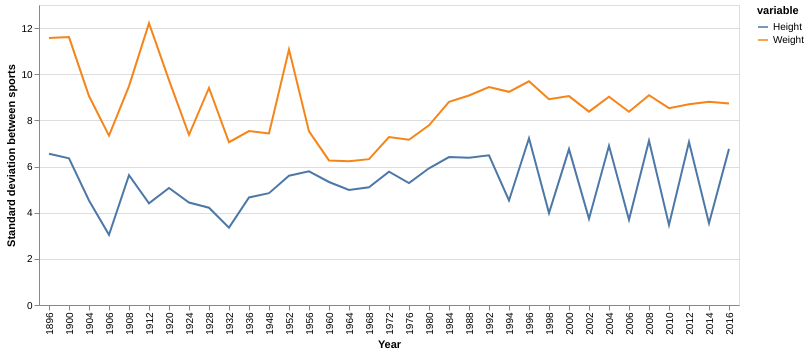

In [4]:
# standard deviation of weights between sports across years

# higher = more specialisation

mean_by_year = data.groupby(["Year","Sport"])["Weight","Height"].mean()

std_mean_by_year = mean_by_year.groupby(["Year"]).std().reset_index()

melted = std_mean_by_year.melt(id_vars=["Year"],value_vars=["Weight","Height"],value_name="Standard deviation between sports")

alt.Chart(melted).mark_line().encode(
    x='Year:O',
    y='Standard deviation between sports:Q',
    color='variable'
)

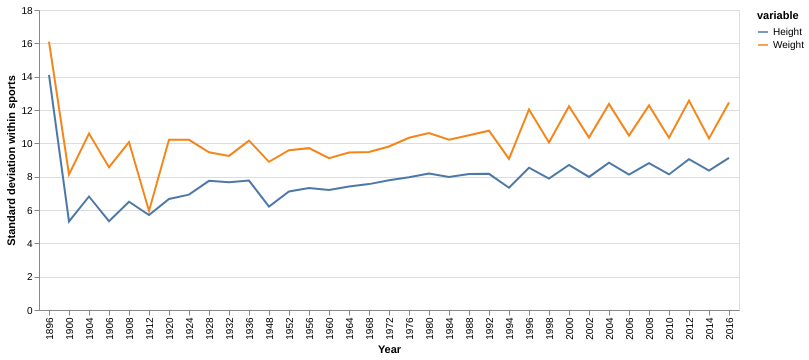

In [5]:
# average standard deviations of weights and heights within sports across years

std_by_year = data.groupby(["Year","Sport"])["Weight","Height"].std()

mean_std_by_year = std_by_year.groupby(["Year"]).mean().reset_index()

#print(avg_std_by_year.head())

#print(avg_std_by_year.melt(id_vars=["Year"],value_vars=["Weight","Height"]).head())

melted = mean_std_by_year.melt(id_vars=["Year"],value_vars=["Weight","Height"],value_name="Standard deviation within sports")

alt.Chart(melted).mark_line().encode(
    x='Year:O',
    y='Standard deviation within sports:Q',
    color='variable'
)

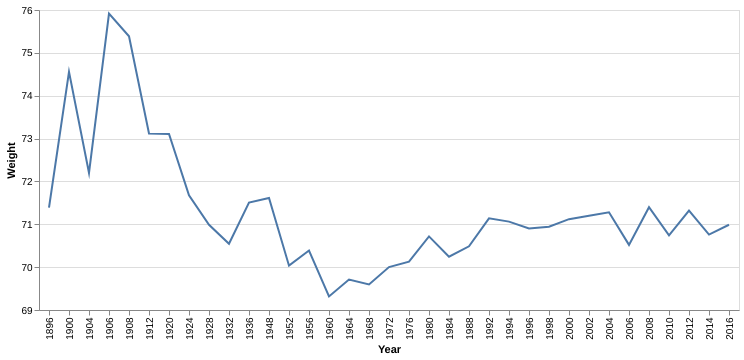

In [11]:
# average height across years

mean_weights = data.groupby(["Year"])["Weight"].mean().reset_index()

#print(mean_weights.head())

alt.Chart(mean_weights).mark_line().encode(
    x='Year:O',
    y=alt.Y('Weight:Q',scale=alt.Scale(zero=False))
)

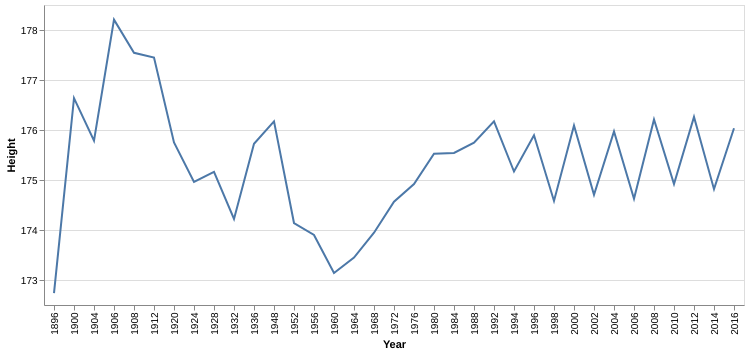

In [12]:
mean_heights = data.groupby(["Year"])["Height"].mean().reset_index()

#print(mean_heights.head())

alt.Chart(mean_heights).mark_line().encode(
    x='Year:O',
    y=alt.Y('Height:Q',scale=alt.Scale(zero=False))
)